# =============== HS Code Recommendation Model ==================


# [1] Defining the Problem

## 1.1 Understanding HS Code

### 1.1.1 What is HS Code?
- HS Code (Harmonized System Code) is a numeric code that classifies commodities in international trading.
- Since it is a code that classifies a commodity, each item has its own HS code.

### 1.1.2 Composition of HS Code
- International standard of HS code is 6 digits. Since this is an international standard, this is same for any country.
- The digits following the 6 digits are sub-divided appropriately for each country, and 10~12 digit HS code is used for each country.
- The international standard 6 digits are divided into 3 sections, 2 digits each: Chapter - Heading - Subheading.

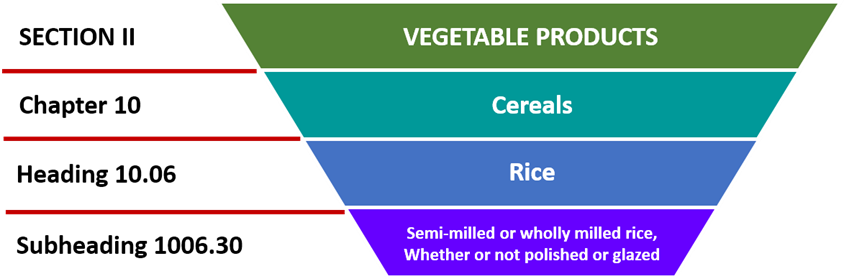

- In this practice, we use the 10-digit HS code data from chapter 21(Miscellaneous edible preparations).

## 1.2 Defining the Problem

### 1.2.1 The Problem

- The importer need to find the HS code appropriate for the goods that is being entered into the declarations. However, it is not an easy task to find the appropriate HS code from the large number of items.
- The customs fee differs based on the HS code of a commodity. Thus, the importers might try to choose a HS CODE that has lower customs fee. The customs specialists need to inspect the declarations to find such incorrect HS Code declarations.

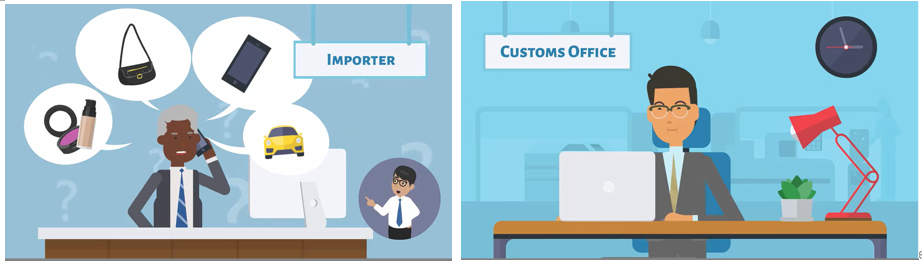

### 1.2.2 Objective of the Model

- Our objective is to create a model that finds the most appropriate HS Code for the declared goods.
- Specifically, we aim to create a model that outputs 3 most appropriate HS Codes for the inputted name of the item from the declarations.
- This model can be used to recommend an appropriate HS Code when the importer is filling out the declarations. Also, it can be used to compare the recommended HS Code to the declared HS Code to find declarations with likely incorrect HS codes.

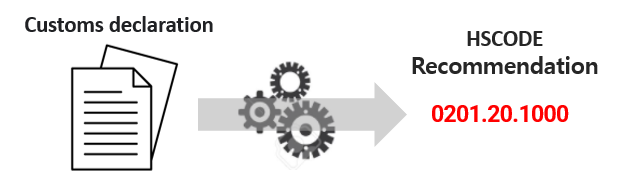

# [2] Understanding the Algorithm

## 2.1 Data

### 2.1.1 Data Structure

- The structure of the dataset needed for training is as follows:

![img](https://i.imgur.com/g0DNgI5.png)

- The import declaration data includes data such as HS Code, reported name, product name, model standards, ingredient etc.
- For each data, HS code is composed of 10-12 digit numbers. Data such as reported name, product name, model standard, and ingredients are stored as text.
- Text data (unstructured data) is composed of HS Code, reported name, product description, model standard, and ingredients. The text data is used as the dataset.

![img](https://i.imgur.com/3b8ENof.png)

### 2.1.2 Data Type

- As above, the dataset composed of HSCODE and Description column is divided into training dataset and test dataset.
- In this coding practice, the training dataset train_data.csv and test_data.csv dataset used for performance evaluation are provided.
- The ratio of training dataset to test dataset is usually 9:1.
- train_data.csv is the "train" dataset used for training the model.
- test_data.csv is the "test" dataset used for evaluating the performance of the model.

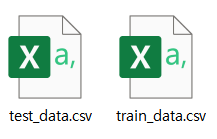

## 2.2 Algorithm

### 2.2.1 Doc2Vec

- In this coding practice, Doc2Vec model is used.
- Embedding is performed similar to Word2Vec against the Description text. HSCODE is used as a single word(paragraph token) to perform embedding on the document. 

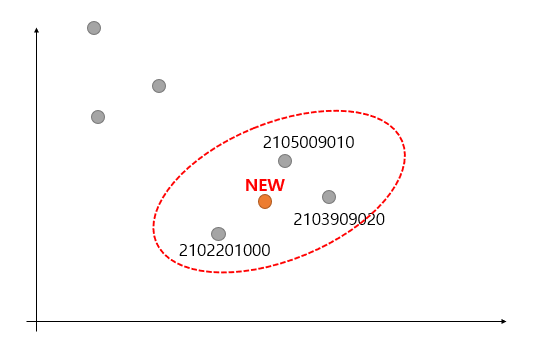

- Doc2Vec has two models: DM and DBow. In this coding practice, we will use the PV-DBOW method.
> - DM method performs embedding by using paragraph vectors and previous words to predict the next words.
Using fixed-size words called Windows as contextual information(context), it trains by moving one by one from the first word to the next.
> - PV-DBOW method performs embedding by randomly predicting the words from the paragraph using only the paragraph Id. Paragraph vector is the input, and the output is the randomly selected word from the paragraph.

> 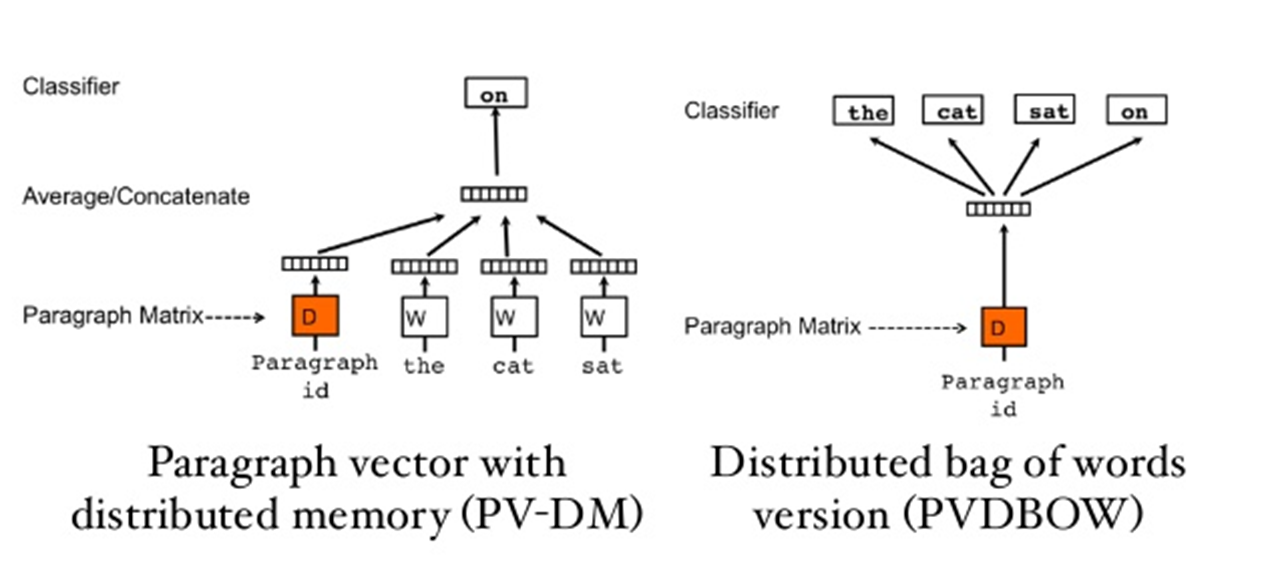

### 2.2.2 Cosine Similarity

In this practice, when measuring the similarity between HSCODE vectors, Cosine Similarity is used.
- If a new declarations is entered, we output 3 HSCODE vectors that are most similar(Largest cosine similarity) through embedding.

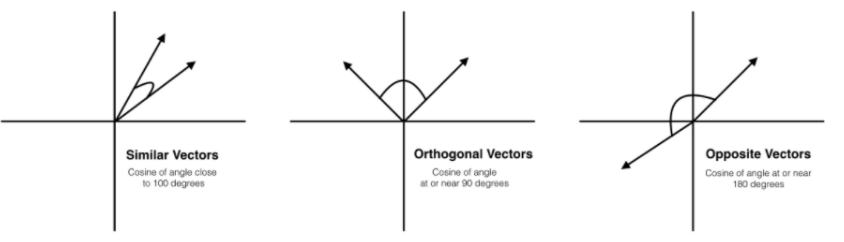

- Below is the formula for calculating Cosine similarity.

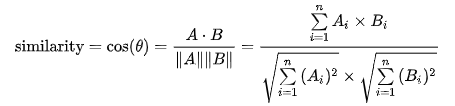

### 2.2.3 Evaluating Performance

- Train the Doc2Vec model using train_data.csv file (Train set).
- Using the trained model, perform embedding by inputting Description in test_data.csv file (Test Set).
- Output top 3 HSCODE vectors with highest similarity to the trained HSCODE vectors.
- Check whether the actual HSCODE is part of (included in) the 3 HSCODEs outputted above.

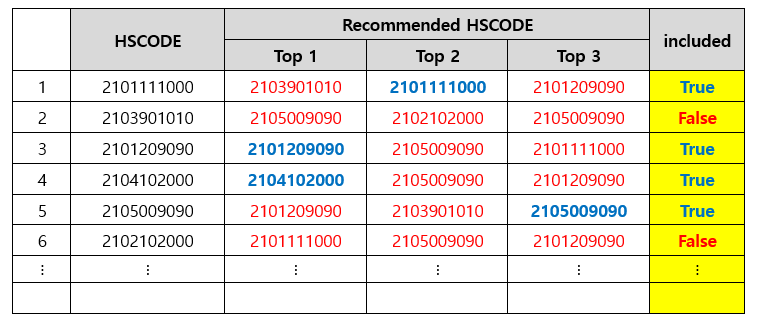

- Calculate the ratio of included=true count to the total data count, and use this as a performance indicator.

$$ \text{Evaluation Metric} = \frac {\text{number of included is True}} {\text{total number of data}} $$ 

# [3] Preparation

## 3.1 Library

### 3.1.1 Installing Packages

- Since there are some packages that are not provided by Python by default, these packages need to be downloaded by the user.
- You can download the required packages by referring to the code block below.

In [ ]:
# You may restart your kernel
!pip install gensim==3.8.3

In [ ]:
# You may restart your kernel
!pip install pandas

In [ ]:
# You may restart your kernel
!pip install tqdm

If the above code does not work, install required packages by referring to the instructions below.

***Install gensim*** -> https://pypi.org/project/gensim/

***Install pandas*** -> https://pandas.pydata.org/docs/getting_started/install.html

***Install tqdm*** -> https://pypi.org/project/tqdm/

You may restart your machine.

### 3.1.2 Importing the Packages

Once the download completes, import required packages.

In [ ]:
import re
import pandas as pd
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from tqdm import tqdm
import os

******

## 3.2 Data

### 3.2.1 Training Set

Load training set(train_data.csv).

In [ ]:
df_train = pd.read_csv("./sample/train_data.csv", sep="\t", dtype='str')
df_train = df_train.drop_duplicates()
df_train

,HSCODE,DESC
0,2101111000,EXTRACTS ESSENCES AND CONCENTRATES OF COFFEE C...
1,2101111000,INSTANT COFFEE MICKEY MOUSE COFFEE TIME 16G MI...
2,2101111000,INSTANT COFFEE STARBUCKS KENYA ESPRESSO CAPSUL...
3,2101111000,INSTANT COFFEE COFFEE LAUDATIO KAFFEEPADS CLAS...
4,2101111000,INSTANT COFFEE COFFEE TEA AURORA DE LA PAZ COF...
...,...,...
12084,2106909099,"OTHER MULTIVITAMIN, GINKGOLD, PRIMADOPHILUS NA..."
12085,2106909099,OTHER MP CORE CLA 180 SOFTGELS VPX MASTER BLAS...
12086,2106909099,OTHER COROMEGA OMEGA-3 FRUIT GUMMIES FOR ADULT...
12087,2106909099,OTHER SOLGAR TRIPLE STRENGTH OMEGA3 950 MG 100...


### 3.2.2 Test Set

Load test set(test_data.csv).

In [ ]:
df_test = pd.read_csv("./sample/test_data.csv", sep="\t", dtype='str')
df_test = df_test.drop_duplicates()
df_test

,HSCODE,DESC
0,2101111000,INSTANT COFFEE ILLY INTENSO COFFEE CAPSULE ILL...
1,2101111000,EXTRACTS ESSENCES AND CONCENTRATES OF COFFEE S...
2,2101111000,INSTANT COFFEE INSTANT COFFEE GREEN COFFEE BEAN
3,2101111000,INSTANT COFFEE S ALI COFFEE S ALI COFFEE 1KG
4,2101111000,INSTANT COFFEE FOOD NESCAFE DOLCE GUSTO KAPSEL...
...,...,...
2302,2102203010,CHLORELLA OF TABLET CHLORELLA CHLORELLA TABLET...
2303,2102203010,CHLORELLA OF TABLET CHLORELLA CHLORELLA TABLET...
2304,2102203010,CHLORELLA OF TABLET CHLORELLA CHLORELLA TABLET...
2305,2102203010,CHLORELLA OF TABLET CHLORELLA CHLORELLA TABLET...


## 3.3 Data Preprocessing

### 3.3.1 Defining Stopwords

Stopwords are:
- When we analyze a language, there are words that have meaning, and there are "meaningless" words or postpositions.
- "Meaningless" words such as these are called stopwords.

In [ ]:
# Setting up stopwords
org_stop_words = {'of', 'or', 'and', 'for', 'than', 'the', 'in', 'with', 'to', 'but', 'by', 'whether',
                  'on', 'its', 'an', 'their', 'at', 'this', 'which', 'from', 'as', 'be', 'is', 'other'}

### 3.3.2 Preprocessing Train Set

We perform preprocessing on train set data. Preprocessing is performed as follows:

- Multiple whitespaces are converted to single whitespace
- Uppercase is converted to lowercase
- Special characters are removed
- Stopwords are removed
- Perform tokenization on the preprocessed text for each words.

In [ ]:
# regular expression pattern
space_pattern = re.compile(r'\s\s+') # Process whitespace
remove_pattern = re.compile(r'[\;\,\)\(\[\]]') # select only ; , ) ( ] [

# Process white space
df_train["DESC"] = df_train["DESC"].apply(lambda x : re.sub(space_pattern, " ", x))

# Create a list where the preprocessing data is stored.
refined_text_list = []

# For each dataframe row, iterate and perform data preprocessing.
for idx, row in tqdm(df_train.iterrows(), total=df_train.shape[0]):
    # Convert to lowercase
    text = row['DESC'].lower()
    # Remove some special characters
    text = re.sub(remove_pattern, " ", text)
    # split
    text_split = text.split()
    
    # Create an array only selecting words with more than 1 character, and is not part of stopwords.
    org_contents_split = [w for w in text_split if len(w.strip()) > 1 and w.strip() not in org_stop_words]  
    org_contents = " ".join(w for w in org_contents_split)

    # Convert multiple whitespace into one whitespace.
    final_sentence = re.sub(space_pattern, " ", org_contents)
    
    # Add the preprocessed data to the list.
    refined_text_list.append(final_sentence)


# Add the preprocessed data to the dataframe.
df_train['REFINED_TEXT'] = refined_text_list
df_train = df_train.sort_values(by=['HSCODE', 'REFINED_TEXT']).drop_duplicates(subset=['HSCODE', 'REFINED_TEXT']).reset_index(drop=True)
df_train

100%|██████████| 12089/12089 [00:05<00:00, 2039.68it/s]


,HSCODE,DESC,REFINED_TEXT
0,2101111000,BOWLS AND DISHES EXTRACTS ESSENCES AND CONCENT...,bowls dishes extracts essences concentrates co...
1,2101111000,COFFEE COFFEE FORTADO COFFEE CAPSULE 1 SLEEVE ...,coffee coffee fortado coffee capsule sleeve vo...
2,2101111000,COFFEE COFFEE TEA ESPRESSO FORZA ESPRESSO OR ROSE,coffee coffee tea espresso forza espresso rose
3,2101111000,COFFEE ESPRESSO DECAFFEINATO ESPRESSO FORTISSI...,coffee espresso decaffeinato espresso fortissi...
4,2101111000,COFFEE ESPRESSO ONYX 12 ESPRESSO COLOMBIA 08,coffee espresso onyx 12 espresso colombia 08
...,...,...,...
11982,2106909099,OTHER VITALITY WORKS OREGANO OIL CARVACROL 70 ...,vitality works oregano oil carvacrol 70 120 li...
11983,2106909099,OTHER VITAMIN C 1000 MG SOLGAR MILK THISTLE 25...,vitamin 1000 mg solgar milk thistle 250 vegeta...
11984,2106909099,OTHER VITAMIN B 150C VITAMIN 60C,vitamin 150c vitamin 60c
11985,2106909099,OTHER WOMENS ONE DAILY 50 PLUS 300MG 60CTS L A...,womens one daily 50 plus 300mg 60cts arginine ...


### 3.3.3 Test Set Preprocessing

Similar to train set, we perform the same preprocessing to test set.

In [ ]:
# Remove whitespace
df_test["DESC"] = df_test["DESC"].apply(lambda x : re.sub(space_pattern, " ", x))

# Array where the preprocessing data will be stored
refined_text_list = []

# Perform data proprocessing, iterating through data frame rows.
for idx, row in tqdm(df_test.iterrows(), total=df_test.shape[0]):
    # Covert to lowercase
    text = row['DESC'].lower()
    # Remove some special characters
    text = re.sub(remove_pattern, " ", text)
    # split
    text_split = text.split()
    
    # Create an array only selecting words with more than 1 character, and is not part of stopwords.
    org_contents_split = [w for w in text_split if len(w.strip()) > 1 and w.strip() not in org_stop_words]  
    org_contents = " ".join(w for w in org_contents_split)

    # Convert multiple whitespaces to one whitespace
    final_sentence = re.sub(space_pattern, " ", org_contents)
    
    refined_text_list.append(final_sentence)


# Add the preprocessing data to the dataframe.
df_test['REFINED_TEXT'] = refined_text_list
df_test = df_test.sort_values(by=['HSCODE', 'REFINED_TEXT']).drop_duplicates(subset=['HSCODE', 'REFINED_TEXT']).reset_index(drop=True)
df_test

100%|██████████| 2307/2307 [00:01<00:00, 2009.34it/s]


,HSCODE,DESC,REFINED_TEXT
0,2101111000,OTHER ()(COFFEE)LOR ESPRESSO ()(COFFEE)KAFFEE ...,coffee lor espresso coffee kaffee liebhaber box
1,2101111000,EXTRACTS ESSENCES AND CONCENTRATES OF COFFEE B...,extracts essences concentrates coffee blue bot...
2,2101111000,EXTRACTS ESSENCES AND CONCENTRATES OF COFFEE N...,extracts essences concentrates coffee nescafe ...
3,2101111000,EXTRACTS ESSENCES AND CONCENTRATES OF COFFEE R...,extracts essences concentrates coffee ristrett...
4,2101111000,EXTRACTS ESSENCES AND CONCENTRATES OF COFFEE S...,extracts essences concentrates coffee starbuck...
...,...,...,...
2299,2106909099,OTHER SOLGAR NATURAL ASTAXANTHIN 5 MG 60 SOFTG...,solgar natural astaxanthin mg 60 softgels solg...
2300,2106909099,OTHER SOURCE NATURALS NIACIN 250 BLUEBONNET CO...,source naturals niacin 250 bluebonnet coenzyme...
2301,2106909099,OTHER SUPER NUTRITION PERFECT FAMILY ENERGIZIN...,super nutrition perfect family energizing mult...
2302,2106909099,OTHER SWANSON ULTRA URIC ACID CLEANSE 60 VEGGI...,swanson ultra uric acid cleanse 60 veggie caps...


# [4] Model Training

## 4.1 Training

### 4.1.1 Creating Doc2Vec Model

- In this coding practice, we use Doc2Vec model.
- We use PV-DBOW method of Doc2Vec model.
- Below code creates an instance of PV-DBOW model.

In [ ]:
model = Doc2Vec(min_count=0, window=5, trim_rule=callable, vector_size=200, sample=1e-4,
                    negative=5, workers=os.cpu_count(), hs=1, max_vocab_size=None, alpha=0.025, seed=1, min_alpha=0.001,
                    dm=0, dbow_words=0, dm_mean=0, dm_concat=0, dm_tag_count=1, docvecs=None, 
                    docvecs_mapfile=None, comment=None)

### 4.1.2 Model Training

Assign and label HSCODE that corresponds to the description as paragraph id.

In [ ]:
# paragraph id = HSCODE
sentence = []
for idx, row in tqdm(df_train.iterrows(), total=df_train.shape[0]):
    sentence.append(TaggedDocument(row['REFINED_TEXT'].split(), [row['HSCODE']]))

100%|██████████| 11987/11987 [00:01<00:00, 10289.64it/s]


Compose a vocabulary of tokens(words) included in the entire description data.

In [ ]:
# vocab creation
model.build_vocab(sentence)

Perform training of Doc2Vec model.

In [ ]:
# model training
model.train(sentence, total_examples=model.corpus_count, epochs=10)

## 4.2 Evaluating

### 4.2.1 Check Cosine Similarity

- Perform embedding against the test set data using the model.
- Extract 3 HSCODEs with highest similarity.
- Each column denotes following:
> HSCODE : Test Set's actual HSCODE  
> TOP_1_SCORE : Highest cosine similarity  
> TOP_1_HS : HSCODE that has the highest cosine similarity  
> TOP_2_SCORE : Second highest cosine similarity
> TOP_2_HS : HSCODE that has the second highest cosine similarity  
> TOP_3_SCORE : Third highest cosine similarity
> TOP_3_HS : HSCODE that has the third highest cosine similarity  

In [ ]:
# Evaluate similarity
df_sim = pd.DataFrame(columns = ['HSCODE', 'TOP_1_HS', 'TOP_1_SCORE', 'TOP_2_HS', 'TOP_2_SCORE', 'TOP_3_HS', 'TOP_3_SCORE'])
for idx, row in tqdm(df_test.iterrows(), total=df_test.shape[0]):
    # Method for data prediction(return result for top 3)
    input_vector = model.infer_vector(row['REFINED_TEXT'].split(), alpha=0.025, min_alpha=0.001, steps=20)
    similarities = model.docvecs.most_similar([input_vector], topn=3)
    simil_result = [(simil[0], round(simil[1], 4)) for simil in similarities]
    df_sim = df_sim.append({'HSCODE' : row['HSCODE'],
                            'TOP_1_HS' : simil_result[0][0], 'TOP_1_SCORE' : simil_result[0][1], 
                            'TOP_2_HS' : simil_result[1][0], 'TOP_2_SCORE' : simil_result[1][1], 
                            'TOP_3_HS' : simil_result[2][0], 'TOP_3_SCORE' : simil_result[2][1]}, ignore_index= True)

df_sim

100%|██████████| 2304/2304 [00:31<00:00, 73.93it/s]


,HSCODE,TOP_1_HS,TOP_1_SCORE,TOP_2_HS,TOP_2_SCORE,TOP_3_HS,TOP_3_SCORE
0,2101111000,2101111000,0.8132,2101121000,0.7501,2101119000,0.6611
1,2101111000,2101111000,0.7348,2101121000,0.6766,2106903011,0.6280
2,2101111000,2101111000,0.7646,2101121000,0.7577,2101119000,0.6227
3,2101111000,2101121000,0.7925,2101111000,0.7681,2101119000,0.5969
4,2101111000,2101111000,0.7717,2101119000,0.7314,2101121000,0.7256
...,...,...,...,...,...,...,...
2299,2106909099,2106909099,0.7966,2102203010,0.6524,2106909091,0.5537
2300,2106909099,2106909099,0.8010,2102203010,0.6669,2102204010,0.5782
2301,2106909099,2106909099,0.7327,2102203010,0.6779,2102203090,0.6324
2302,2106909099,2106909099,0.8100,2102203010,0.6478,2106903029,0.6170


### 4.2.2 Evaluate Performance

- Check (True, False) whether the HSCODE actually belongs to the HSCODEs with top 3 similarity .
- Add the result value to the INCLUDED column.
- Calculate the ratio of the count of INCLUDED=TRUE to the total data count(Inclusion rate) to evaluate performance. 

In [ ]:
# Check whether included or not

correct_result = []
for idx, row in tqdm(df_sim.iterrows(), total=df_sim.shape[0]):
    simil_hs_list = [row['TOP_1_HS'], row['TOP_2_HS'], row['TOP_3_HS']]
    if row['HSCODE'] in simil_hs_list:
        correct_result.append(True)
    else:
        correct_result.append(False)
df_sim['INCLUDED'] = correct_result

df_sim

100%|██████████| 2304/2304 [00:00<00:00, 9700.89it/s]


,HSCODE,TOP_1_HS,TOP_1_SCORE,TOP_2_HS,TOP_2_SCORE,TOP_3_HS,TOP_3_SCORE,INCLUDED
0,2101111000,2101111000,0.8132,2101121000,0.7501,2101119000,0.6611,True
1,2101111000,2101111000,0.7348,2101121000,0.6766,2106903011,0.6280,True
2,2101111000,2101111000,0.7646,2101121000,0.7577,2101119000,0.6227,True
3,2101111000,2101121000,0.7925,2101111000,0.7681,2101119000,0.5969,True
4,2101111000,2101111000,0.7717,2101119000,0.7314,2101121000,0.7256,True
...,...,...,...,...,...,...,...,...
2299,2106909099,2106909099,0.7966,2102203010,0.6524,2106909091,0.5537,True
2300,2106909099,2106909099,0.8010,2102203010,0.6669,2102204010,0.5782,True
2301,2106909099,2106909099,0.7327,2102203010,0.6779,2102203090,0.6324,True
2302,2106909099,2106909099,0.8100,2102203010,0.6478,2106903029,0.6170,True


- Evaluation result

In [ ]:
print("Total evaluation data count : {}".format(len(df_sim)))
print("Count included in top 3 : {} / {} ".format(len(df_sim[df_sim['INCLUDED'] == True]), len(df_sim)))
print("Inclusion rate : {}%".format(round(len(df_sim[df_sim['INCLUDED'] == True]) / len(df_sim) * 100, 2)))

Total evaluation data count : 2304
Count included in top 3 : 2059 / 2304 
Inclusion rate : 89.37%


## 4.3 Check the Results

Let's check the result by testing the result of the trained model above.

### 4.3.1 Preparation

- Load the table that contains the HS item information.

In [ ]:
# Load the HSCODE item information
hs_info_df = pd.read_pickle("./sample/hs_info_df.pickle")
hs_info_df

,HSCODE,information
0,1001110000,Seed
1,1001190000,Other
2,1001911000,Meslin
3,1001919000,Other
4,1001991010,For feedingMeslin
...,...,...
11058,9704009000,Other
11059,9705000000,Collections and collectors＇ pieces of zoologic...
11060,9706001000,Ceramics
11061,9706002000,Musical instruments


Define a function that check the result from the inputted text.

In [ ]:
# Function that returns the sample test result

def simil_test_input(model, input_text):
    # Preprocessing
    input_text = re.sub(space_pattern, " ", input_text)
    input_text = input_text.lower()
    input_text = re.sub(remove_pattern, " ", input_text)
    text_split = input_text.split()
    org_contents_split = [w for w in text_split if len(w.strip()) > 1 and w.strip() not in org_stop_words]  
    org_contents = " ".join(w for w in org_contents_split)
    final_sentence = re.sub(space_pattern, " ", org_contents)
    refined_text_list = final_sentence.split()
    # Model input
    input_vector = model.infer_vector(refined_text_list, alpha=0.025, min_alpha=0.001, steps=20)
    similarities = model.docvecs.most_similar([input_vector], topn=3)
    simil_result = [(simil[0].replace('TARGET_', ''), round(simil[1], 4)) for simil in similarities]
    return simil_result

### 4.3.2 Sample 1

The information of the sample to test against is as follows:
- HSCODE : 2104103000	 
- information : Of vegetable
- DESC : VEGETABLE VENUSTARS CABBICHOKE GOLD CABBAGE SOUP POWDER HEAT VENUSTARS CABBICHOKE GOLD CABBAGE SOUP POWDER HEATED 250G  

Run the below code, and input by copying the text that corresponds to DESC.

In [ ]:
input_text = input("DESC input:")
result = simil_test_input(model, input_text)

for idx, data in enumerate(result):
    this_name_df = hs_info_df[hs_info_df['HSCODE'] == data[0]]
    print("\n{}rank :\n\tHSCODE : {}\n\tinformation : {}\n\tSCORE : {}".format(idx + 1, data[0], this_name_df['information'].values[0], data[1]))

DESC input:VEGETABLE VENUSTARS CABBICHOKE GOLD CABBAGE SOUP POWDER HEAT VENUSTARS CABBICHOKE GOLD CABBAGE SOUP POWDER HEATED 250G

1rank :
	HSCODE : 2104103000
	information : Of vegetable
	SCORE : 0.869

2rank :
	HSCODE : 2104200000
	information : Homogenised composite food preparations
	SCORE : 0.5401

3rank :
	HSCODE : 2104102000
	information : Of fish
	SCORE : 0.4984


### 4.3.3 Sample 2


The information of the sample to test against is as follows:
- HSCODE : Unknown
- information : Unknown
- DESC : COFFEE CAPSULE

After executing the code below, input by copying the text that corresponds to DESC.

In [ ]:
input_text = input("DESC input :")
result = simil_test_input(model, input_text)

for idx, data in enumerate(result):
    this_name_df = hs_info_df[hs_info_df['HSCODE'] == data[0]]
    print("\n{}rank :\n\tHSCODE : {}\n\tinformation : {}\n\tSCORE : {}".format(idx + 1, data[0], this_name_df['information'].values[0], data[1]))

DESC input :COFFEE CAPSULE

1rank :
	HSCODE : 2101121000
	information : Preparations of instant coffee
	SCORE : 0.7654

2rank :
	HSCODE : 2101111000
	information : Instant coffee
	SCORE : 0.6919

3rank :
	HSCODE : 2101119000
	information : Other
	SCORE : 0.6208


# [5] Conclusion


### 5.1 Summary of the Coding Practice
- We trained the AI model using the reported import declaration data from the past.
- We also implemented an algorithm that recommends 3 HSCODE with the highest similarity by inputting import declaration data to the AI.
- By using the untrained new data, the result of the evaluation of the performance of the model was 90%.
The evaluation method was based on the comparison of the actual HS code to the 3 HSCODEs recommended by the model.

### 5.2  Challenges and Importance of HS Code Application
- WCO provides 6 digit HS Code based on item classification, but it is not an easy task to apply a correct HS Code due to the variety of the products.
- It is important to apply a correct HS Code since the taxation and tariff differs depending on the HS code.
- Also, it is required for monitoring restricted items or banned items for trading.


### 5.3 Expected Impact of the Model
- If we apply the method we learned in this lesson utilizing AI to pre-existing methods for finding HS codes, we should be able to quickly and more accurately find the correct HS Codes.
- The positive impact of this can be viewed from the perspective of the importer and the customs specialist as follows:
- Firstly, the importer can reduce the time spent on finding the correct HS code.
- Secondly, the customs specialist do not have to inspect every import declarations. They can inspect only the suspicious declarations, enabling them to process quickly and more accurately. 



### 5.4 Next Chapter
- In the next chapter, we will experience the AI-HS service that is implemented with the HS Code recommendation algorithm utilizing AI.
- You can experience the AI-based HS Code recommendation service through WCO cloud. It could also give you a new insight into artificial intelligence.